![image-2.png](attachment:image-2.png)

# Edunet Foundation : Class Room Exercises

# Breast Cancer Wisconsin (Diagnostic) using ANN Algorithm by TensorFlow

### Objective:
The objective of applying an Artificial Neural Network (ANN) algorithm using TensorFlow on the Breast Cancer Wisconsin (Diagnostic) dataset is to create a predictive model that can accurately determine whether a breast tumor is malignant or benign based on various medical features derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. The aim is to assist medical professionals in making accurate and timely diagnoses, ultimately improving patient outcomes.

### Breast Cancer Wisconsin (Diagnostic) Dataset:
The Breast Cancer Wisconsin (Diagnostic) dataset is a popular dataset used in machine learning and medical research. It consists of 569 samples of breast cancer cases, each with 30 features derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. The dataset is divided into two classes: benign (non-cancerous) and malignant (cancerous).

Dataset link: https://www.kaggle.com/datasets/jeandedieunyandwi/breast-cancer-dataset-uci-ml

#Dataset Descrption


This dataset contains medical measurements of breast tumors and is used to predict whether a tumor is benign (non-cancerous) or malignant (cancerous)

- Each row represents one patient’s tumor.
- Each column represents a feature (measurement) of that tumor.

**Typical Columns**

1️⃣ ID

- Unique identifier for each patient

- ❌ Not used for prediction

2️⃣ Diagnosis (Target Column)

- **M → Malignant (Cancerous)**

- **B → Benign (Non-cancerous)**

📌 This is what the model tries to predict.

3️⃣ Tumor Measurements (Features)

These are calculated from medical images:

- Feature Type	Meaning (Simple)
- Radius	Size of tumor
- Texture	Smoothness of surface
- Perimeter	Boundary length
- Area	Tumor size
- Smoothness	How smooth the edges are
- Compactness	How tightly packed
- Concavity	How indented the shape is
- Symmetry	Shape symmetry

📌 These features help differentiate cancerous vs non-cancerous tumors.

4️⃣ Feature Groups

Each measurement is usually provided as:

- Mean

- Standard error

- Worst value

Example:

- radius_mean

- radius_se

- radius_worst

Example Row (Conceptual)
| radius_mean | texture_mean | area_mean | diagnosis |
| ----------- | ------------ | --------- | --------- |
| 14.5        | 20.3         | 640       | M         |


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
!gdown 1n_5v-O6qYoiH3x1RrQE83kwIzy0DCe9o


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1n_5v-O6qYoiH3x1RrQE83kwIzy0DCe9o

but Gdown can't. Please check connections and permissions.


In [67]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [68]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [70]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
304,89296,B,11.46,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,...,21.61,82.69,489.8,0.11440,0.1789,0.12260,0.05509,0.2208,0.07638,NaN
340,89813,B,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,...,21.51,111.40,862.1,0.12940,0.3371,0.37550,0.14140,0.3053,0.08764,NaN
305,893061,B,11.60,24.49,74.23,417.2,0.07474,0.05688,0.01974,0.01313,...,31.62,81.39,476.5,0.09545,0.1361,0.07239,0.04815,0.3244,0.06745,NaN
374,9013005,B,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,...,20.21,99.16,670.6,0.11050,0.2096,0.13460,0.06987,0.3323,0.07701,NaN
282,89122,M,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,...,28.65,152.40,1628.0,0.15180,0.3749,0.43160,0.22520,0.3590,0.07787,NaN


In [71]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [72]:
df.shape

(569, 33)

In [73]:
df.info()
# checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [74]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [75]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [76]:
df['diagnosis']=df['diagnosis'].map({'B':0 , 'M' : 1})

In [77]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
df = df.drop(columns = ['id','Unnamed: 32'])

<Axes: xlabel='diagnosis', ylabel='count'>

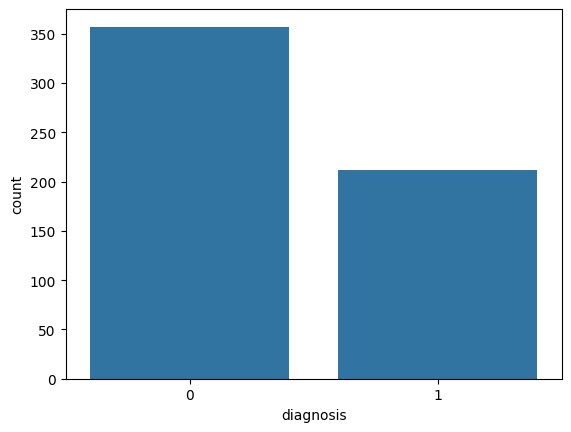

In [79]:
sns.countplot(data = df , x= 'diagnosis' )

In [80]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [81]:
#Independent and Dependent Variables

X = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

In [82]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [84]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [85]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.341663,0.365911,0.335982,0.201442,0.331137,0.280412,0.118627,0.151988,0.225253,0.213353,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401
1,0.246533,0.121069,0.243867,0.132471,0.487226,0.232225,0.066893,0.143241,0.414141,0.310657,...,0.192458,0.154318,0.204044,0.088478,0.472363,0.224321,0.079193,0.281340,0.375320,0.245113
2,0.294335,0.261075,0.278764,0.168865,0.176221,0.079320,0.101593,0.054920,0.215657,0.134583,...,0.213803,0.421109,0.188605,0.102438,0.257082,0.119830,0.183546,0.170790,0.236941,0.111111
3,0.385205,0.235712,0.380001,0.243097,0.326171,0.234648,0.176898,0.202734,0.269697,0.208509,...,0.350053,0.219083,0.335126,0.197675,0.514627,0.296698,0.265735,0.430241,0.364676,0.277843
4,0.364381,0.352384,0.352083,0.229480,0.415636,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.155048,0.232748,0.552921,0.288587,0.177883


In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Dropout

In [88]:
# # Creating the model
# model1 = Sequential()
# model1.add(InputLayer(input_shape=(30,)))  # Input layer with 30 input features
# model1.add(Dense(26, activation='relu'))  # First hidden layer
# model1.add(Dense(15, activation='relu'))  # Second hidden layer
# model1.add(Dense(1, activation='sigmoid'))  # Output layer
# model1.summary()


model = Sequential([InputLayer(input_shape = (30,)) ,
                    Dense(20 , activation = 'relu'),
                    Dense(13 , activation = 'relu') ,
                    Dense(1 , activation ='sigmoid')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [89]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y=y_train, epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.4032 - loss: 0.7018
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4129 - loss: 0.6822 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6690 - loss: 0.6613 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8548 - loss: 0.6356 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8571 - loss: 0.6180 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - loss: 0.5854 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9051 - loss: 0.5534 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9015 - loss: 0.5168 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9184 - loss: 0.4843 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9054 - loss: 0.4558 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9407 - loss: 0.4038 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

In [90]:
y_pred = (model.predict(X_train) > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_train , y_pred))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       285
           1       0.99      0.97      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



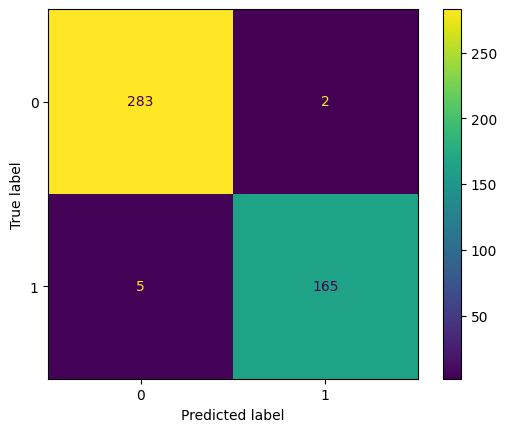

In [91]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_train , y_pred)
ConfusionMatrixDisplay(cm).plot()